In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression
from scipy import stats

In [2]:
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
        'RAD','TAX','PTRATIO','B','LSTAT','MEDV']
 
data = pd.read_csv(r"../zasoby/housing.data",
                   sep=' +', engine='python', header=None, 
                   names=cols)

In [3]:
data1 = data[['LSTAT', 'MEDV']]
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LSTAT   506 non-null    float64
 1   MEDV    506 non-null    float64
dtypes: float64(2)
memory usage: 8.0 KB


<Axes: >

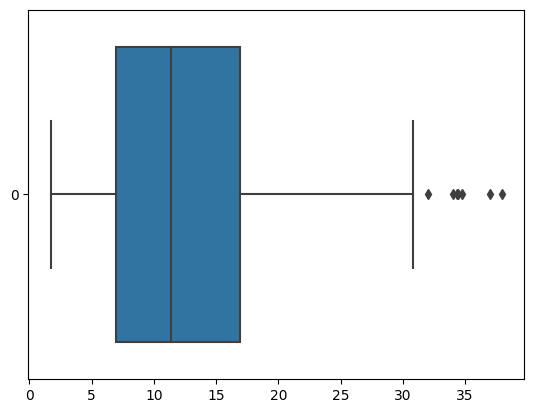

In [5]:
sns.boxplot(data1['LSTAT'], orient='h')

In [10]:
X = data1['LSTAT'].to_numpy().reshape(-1,1)
y = data1['MEDV']

In [11]:
lr1 = LinearRegression()
lr1.fit(X, y)
lr1.score(X, y)

0.5441462975864797

In [13]:
z = abs(stats.zscore(data1))
threshold = 3
data_z = data1[(z<threshold).all(axis=1)]
data_z.info()

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, 0 to 505
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LSTAT   501 non-null    float64
 1   MEDV    501 non-null    float64
dtypes: float64(2)
memory usage: 11.7 KB


<Axes: >

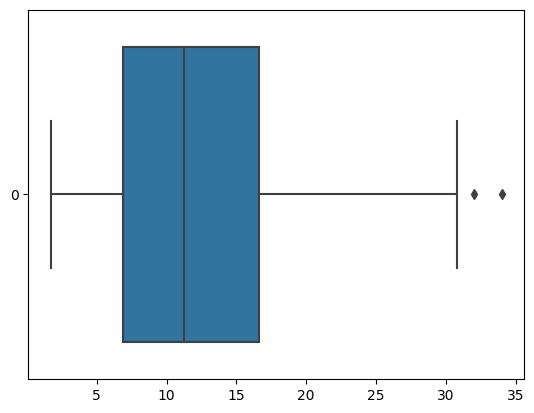

In [15]:
sns.boxplot(data_z['LSTAT'], orient='h')

In [16]:
Xz = data_z['LSTAT'].to_numpy().reshape(-1,1)
yz = data_z['MEDV']

In [17]:
lr1 = LinearRegression()
lr1.fit(Xz, yz)
lr1.score(Xz, yz)

0.561613442074578

In [21]:
Q1 = data1.quantile(0.25) 
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1
cond = ((data1 < (Q1 - 1.5 * IQR)) | (data1 > (Q3 + 1.5 * IQR)))
data_i = data1[~cond.any(axis=1)]
data_i.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459 entries, 0 to 505
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LSTAT   459 non-null    float64
 1   MEDV    459 non-null    float64
dtypes: float64(2)
memory usage: 10.8 KB


<Axes: >

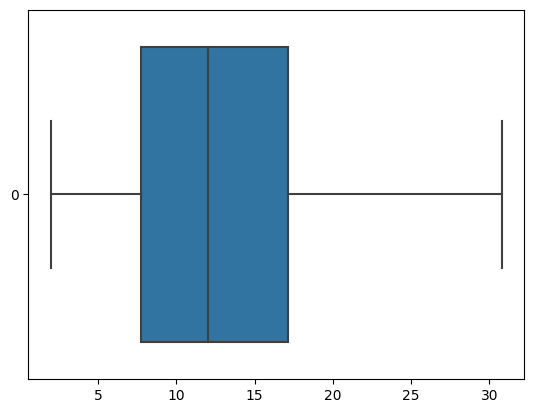

In [22]:
sns.boxplot(data_i['LSTAT'], orient='h')

In [23]:
Xi = data_i['LSTAT'].to_numpy().reshape(-1,1)
yi = data_i['MEDV']

In [24]:
lr1 = LinearRegression()
lr1.fit(Xi, yi)
lr1.score(Xi, yi)

0.6087730602029617